Complete the following exercises:

    Page 89: 7-1 (Using data from the NSFG, make a scatter plot of birth weight versus mother’s age…)
    Page 99: 8-1 (In this chapter we used sample mean to estimate • and found that the sample mean yields lower MSE…)
    Page 99: 8-2 (Suppose that you draw a sample size with n = 10 from an exponential distribution with • = 2…)


# Stoneburner, Kurt
- ## DSC 530 - Week 07

In [56]:
# //****************************************************************************************
# //*** Set Working Directory to thinkstats folder.
# //*** This pseudo-relative path call should work on all Stoneburner localized projects. 
# //****************************************************************************************

import os
import sys
workingPath = os.getcwd().replace("coding", "ThinkStats2\\code")
sys.path.insert(1, workingPath)
os.chdir(workingPath)

In [57]:
# //*** Imports and Load Data
import nsfg
import thinkstats2
import thinkplot
import first
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#resp = nsfg.ReadFemResp()
#preg = nsfg.ReadFemPreg()


- ## Chapter 7, Exercise 1

In [58]:
# //*** Get a pandas dataframe from the first library
live, firsts, others = first.MakeFrames()
# //*** Drop N/A values from agepreg and totalwgt_lb columns
live = live.dropna(subset=['agepreg', 'totalwgt_lb'])

Using data from the NSFG, make a scatter plot of birth weight versus mother’s age.

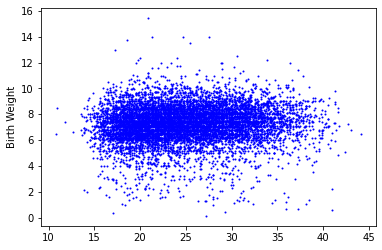

In [59]:
# //*** scatter plot with matplotlib
plt.scatter(live['agepreg'], live['totalwgt_lb'], 1, color='b')
#plt.title(f"Biased Distribution\nMean: {round(resp['numkdhh'][resp['numkdhh'] > 0].mean(),2)}")
#plt.xlabel('Top 30 Jobecodes by Frequency')
plt.ylabel('Birth Weight')
plt.show()


**Plot percentiles of birth weight versus mother’s age.**

In [60]:
# //********************************************
# //*** Reusable Functions Return from Week 03!
# //********************************************
# //*** Returns Series as a PMF
# //********************************************
def build_pmf(input_series):
    output_series = input_series.copy()
    total_values = input_series.sum()
    for value,freq in output_series.items():
        #print(f"{value} {freq} {total_values} {freq/total_values}")
        output_series.loc[value] = freq/total_values
    return output_series

# //*** Build a Cumulative Distribution Function from a Probability Mass Function
# //*** Returns a Series
def build_cdf(input_series):
    # //*** If input is not panda or pd series, try to convert it
    if not isinstance(input_series,pd.core.series.Series):
        input_series = pd.Series(input_series)
        
    # //*** If input is np.Array
    output_series = input_series.copy()
    cumulative_value = 0
    for value,freq in output_series.items():
        #print(f"{value} {freq} {cumulative_value} {freq + cumulative_value}")
        cumulative_value = freq + cumulative_value
        output_series.loc[value] = cumulative_value
    return output_series


[11.537500000000001, 15.212333333333312, 17.74035928143719, 20.506304824561838, 23.455752212389893, 26.435156146179903, 29.411177432543294, 32.30232530120497, 35.240273631840736, 38.10876470588231, 40.91205882352941, 43.54]
12


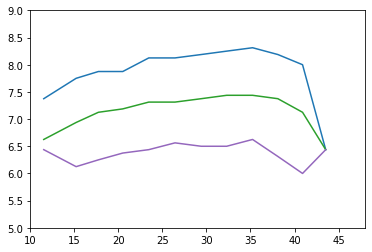

In [231]:
def get_cdf_percentile(input_cdf,percentile):
    #print(f"{input_cdf}")
    #//*** Initialize output to first value
    output = input_cdf.index[0]
    
    #//*** Loop through all items till the value exceeds the percentile
    #//*** Return value from last loop
    for index,value in input_cdf.items():
        
        if value > percentile:
            return output
        else:
            output = index
    
        
        
    

cleaned = live.dropna(subset=['totalwgt_lb', 'agepreg'])
#//*** Build an array and populated with values from 0 - 16
#//*** These will represent binnning indexes or some such

# //*** Arrange Age_min, Agemax 3 bins, Low 
bins = np.arange(10, 48, 3)

#//*** Builds Index values for the bins
#//*** Seems very obtuse to me
indices = np.digitize(cleaned.agepreg, bins)

#//*** Groups the dataframe into groups of binned indexes
groups = cleaned.groupby(indices)   

#print(groups)
#for i, group in groups:
#    print(i, group)

# //*** Builds a list of the age mean for each binned value
mean_age_preg = [group.agepreg.mean() for i, group in groups]
print(mean_age_preg)
# //*** Build a list CDFs for each binned value
#cdfs = [thinkstats2.Cdf(group.wtkg2) for i, group in groups]
CDFs = []
# //*** group is a tuple. Tuple[0] = index, tuple[1] = dataframe
for group in groups:
    #//*** Build Weights for each binned dataframe
    weight_counts = group[1]['totalwgt_lb'].value_counts().sort_index()
    weight_counts_pmf = build_pmf(weight_counts)   
    weight_counts_cdf = build_cdf(weight_counts_pmf)   
    CDFs.append(weight_counts_cdf)

#for cdf in CDFs:
#    print("Value: " + str(get_cdf_percentile(cdf,.25)))

print(len(mean_age_preg))
for x in [.75,.50,.25]:
    
    weight_percentiles = [get_cdf_percentile(cdf,x) for cdf in CDFs]
    # //*** Matplot reference
    plt.plot(mean_age_preg,weight_percentiles,1)
    #plt.tight_layout()

    #plt.xticks(billable_value_count_top_30.index.values, billable_value_count_top_30.index, rotation='vertical')
    #plt.title(f"Biased Distribution\nMean: {round(resp['numkdhh'][resp['numkdhh'] > 0].mean(),2)}")
#plt.xlabel('Birth Weight (lb)')
#plt.ylabel('Age(mean)')

    #plt.figure(figsize=(1,500))
plt.xlim(10,48)
plt.ylim(5,9)
plt.show()
    
    


**Compute Pearson’s and Spearman’s correlations.**

**How would you characterize the relationship between these variables:**

XXXXX

- ## Chapter 8, Exercise 1



In [62]:
# //*** CODE HERE

- ## Chapter 8, Exercise 2



In [63]:
# //*** CODE HERE

In [64]:
# //*** Matplot reference
#plt.scatter(live['totalwgt_lb'], live['agepreg'],1, color='b')
#plt.tight_layout()

#plt.xticks(billable_value_count_top_30.index.values, billable_value_count_top_30.index, rotation='vertical')
#plt.title(f"Biased Distribution\nMean: {round(resp['numkdhh'][resp['numkdhh'] > 0].mean(),2)}")
#plt.xlabel('Top 30 Jobecodes by Frequency')
#plt.ylabel('Item Frequency')
#plt.figure(figsize=(1,500))
plt.show()
